<a href="https://colab.research.google.com/github/cs-giung/course-ml-TP/blob/master/IRIS_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statistics import median
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# np.random.seed(0)

### Dataset : IRIS

In [0]:
# 데이터셋 불러오기
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']
dataset = pd.read_csv(url, names=attributes, skiprows=0, delimiter=',')

In [0]:
# 데이터셋 적절히 수정하기
name2ind = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
ind2name = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
dataset['iris_class'] = [name2ind[e] for e in dataset['iris_class']]

In [4]:
# 데이터셋 훑어보기
print([len(dataset[dataset['iris_class'] == i]) for i in range(3)])
dataset

[50, 50, 50]


,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Experiment \#1 : FFS with Accuracy

  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

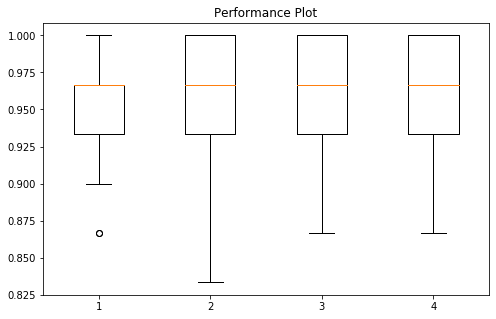

0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 

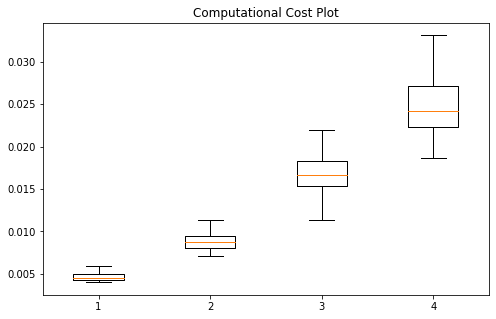

0.004539012908935547, 0.008738875389099121, 0.016675233840942383, 0.024164319038391113, 

In [5]:
performance = dict()
timecomplex = dict()

for t in range(50):
    print('%3d' % t, end='')

    # construct dataset randomly
    shuffled_dataset = dataset.sample(len(dataset))
    train_dataset = shuffled_dataset[:int(len(dataset) * 0.8)]
    valid_dataset = shuffled_dataset[int(len(dataset) * 0.8):]

    # start with empty set
    s_feats = []

    while len(s_feats) < len(attributes) - 1:
        best_acc = 0
        new_feat = None
        
        for feat in attributes[:-1]:

            if feat in s_feats:
                continue
            tmp_feats = s_feats + [feat]

            train_X = train_dataset.drop(attributes[-1], axis=1)
            train_Y = train_dataset.drop(attributes[:-1], axis=1)
            train_X = train_X[tmp_feats].values
            train_Y = train_Y.values.reshape(-1)

            valid_X = valid_dataset.drop(attributes[-1], axis=1)
            valid_Y = valid_dataset.drop(attributes[:-1], axis=1)
            valid_X = valid_X[tmp_feats].values
            valid_Y = valid_Y.values.reshape(-1)

            s_time = time.time()
            lr = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
            lr.fit(train_X, train_Y)
            f_time = time.time()
            time_cost = f_time - s_time

            valid_Y_pred = lr.predict(valid_X)
            valid_acc = (valid_Y == valid_Y_pred).sum() / len(valid_Y == valid_Y_pred)

            # determine best one
            if valid_acc > best_acc:
                best_acc = valid_acc
                new_feat = feat

        s_feats += [new_feat]
        n = len(s_feats)

        if n not in performance:
            performance[n] = []
        
        if n not in timecomplex:
            timecomplex[n] = []

        performance[n].append(valid_acc)
        timecomplex[n].append(time_cost)


boxplot_data = [performance[i] for i in performance]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Performance Plot')
ax.boxplot(boxplot_data)
plt.show()

for i in performance:
    print(median(performance[i]), end=', ')


boxplot_data = [timecomplex[i] for i in timecomplex]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Computational Cost Plot')
ax.boxplot(boxplot_data, showfliers=False)
plt.show()

for i in timecomplex:
    print(median(timecomplex[i]), end=', ')

# Experiment \#2 : BFE with Correlation

  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

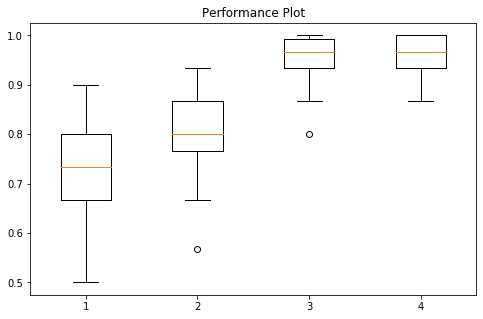

0.7333333333333333, 0.8, 0.9666666666666667, 0.9666666666666667, 

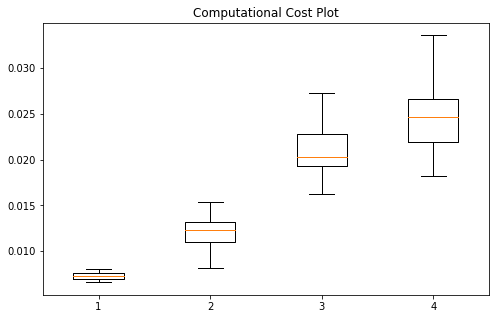

0.007271409034729004, 0.012320995330810547, 0.0202866792678833, 0.024700522422790527, 

In [6]:
performance = dict()
timecomplex = dict()

for t in range(50):
    print('%3d' % t, end='')

    # construct dataset randomly
    shuffled_dataset = dataset.sample(len(dataset))
    train_dataset = shuffled_dataset[:int(len(dataset) * 0.8)]
    valid_dataset = shuffled_dataset[int(len(dataset) * 0.8):]

    # drop feature & train model
    train_X = train_dataset.drop(attributes[-1], axis=1)
    valid_X = valid_dataset.drop(attributes[-1], axis=1)
    train_Y = train_dataset.drop(attributes[:-1], axis=1).values.reshape(-1)
    valid_Y = valid_dataset.drop(attributes[:-1], axis=1).values.reshape(-1)

    feat_rank = attributes[:-1].copy()
    while True:

        # train model
        s_time = time.time()
        lr = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
        lr.fit(train_X.values, train_Y)
        f_time = time.time()
        time_cost = f_time - s_time

        valid_Y_pred = lr.predict(valid_X.values)
        valid_acc = (valid_Y == valid_Y_pred).sum() / len(valid_Y == valid_Y_pred)

        n = len(feat_rank)

        if n not in performance:
            performance[n] = []
        
        if n not in timecomplex:
            timecomplex[n] = []

        performance[n].append(valid_acc)
        timecomplex[n].append(time_cost)

        # rank features with correlation
        corr = train_X.corr()
        corr[np.isnan(corr)] = 0
        corr_vals = []
        corr_rank = []
        for feat in feat_rank:
            corr_vals += [abs(corr[feat]).sum()]
            corr_rank += [feat]
        feat_rank = list(list(zip(*(sorted(zip(corr_vals, corr_rank)))))[1])

        # reduct features
        feat_rank = feat_rank[:-1]
        train_X = train_X[feat_rank]
        valid_X = valid_X[feat_rank]

        if len(feat_rank) == 0:
            break



boxplot_data = [performance[i] for i in sorted(list(performance.keys()))]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Performance Plot')
ax.boxplot(boxplot_data)
plt.show()

for i in sorted(list(performance.keys())):
    print(median(performance[i]), end=', ')


boxplot_data = [timecomplex[i] for i in sorted(list(timecomplex.keys()))]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Computational Cost Plot')
ax.boxplot(boxplot_data, showfliers=False)
plt.show()

for i in sorted(list(timecomplex.keys())):
    print(median(timecomplex[i]), end=', ')

# Experiment \#3 : PCA

  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49

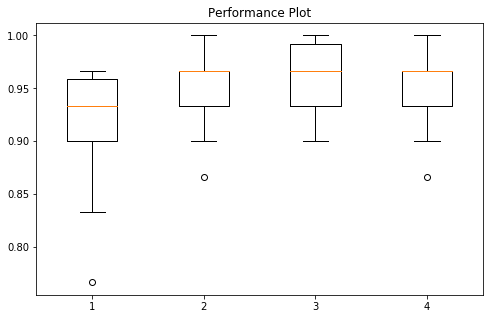

0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 

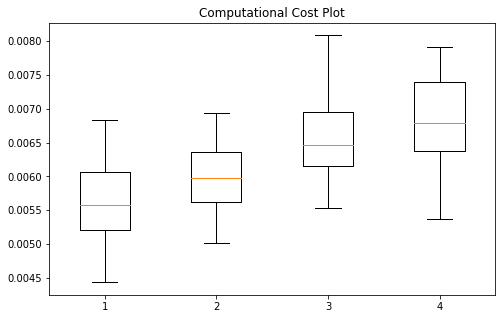

0.005578756332397461, 0.005975961685180664, 0.006471037864685059, 0.0067901611328125, 

In [7]:
performance = dict()
timecomplex = dict()

for t in range(50):
    print('%3d' % t, end='')

    # construct dataset randomly
    shuffled_dataset = dataset.sample(len(dataset))
    train_dataset = shuffled_dataset[:int(len(dataset) * 0.8)]
    valid_dataset = shuffled_dataset[int(len(dataset) * 0.8):]

    train_X = train_dataset.drop(attributes[-1], axis=1).values
    train_Y = train_dataset.drop(attributes[:-1], axis=1).values.reshape(-1)

    valid_X = valid_dataset.drop(attributes[-1], axis=1).values
    valid_Y = valid_dataset.drop(attributes[:-1], axis=1).values.reshape(-1)

    # pca data & train model
    num_feats = np.arange(1, len(attributes), 1)

    for n in num_feats:
        pca = PCA(n_components=n)
        pca.fit(train_X)
        train_X_pca = pca.transform(train_X)
        valid_X_pca = pca.transform(valid_X)

        s_time = time.time()
        lr = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
        lr.fit(train_X_pca, train_Y)
        f_time = time.time()
        time_cost = f_time - s_time

        valid_Y_pred = lr.predict(valid_X_pca)
        valid_acc = (valid_Y == valid_Y_pred).sum() / len(valid_Y == valid_Y_pred)

        if n not in performance:
            performance[n] = []
        
        if n not in timecomplex:
            timecomplex[n] = []

        performance[n].append(valid_acc)
        timecomplex[n].append(time_cost)


boxplot_data = [performance[i] for i in performance]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Performance Plot')
ax.boxplot(boxplot_data)
plt.show()

for i in performance:
    print(median(performance[i]), end=', ')


boxplot_data = [timecomplex[i] for i in timecomplex]
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Computational Cost Plot')
ax.boxplot(boxplot_data, showfliers=False)
plt.show()

for i in timecomplex:
    print(median(timecomplex[i]), end=', ')